In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("../Data/Copy of hackathon_customerData_challenge2.csv")
df.head()

,customerID,Date_UTC,Date_NZDate,date_settlementPeriod,load_power_W,weather_Temp_C
0,793,2022-10-21T18:00:00.000Z,2022-10-22,15,4099.0,NaN
1,793,2022-10-21T18:15:00.000Z,2022-10-22,15,5566.0,NaN
2,793,2022-10-21T18:30:00.000Z,2022-10-22,16,3565.5,NaN
3,793,2022-10-21T18:45:00.000Z,2022-10-22,16,3420.5,NaN
4,793,2022-10-21T19:00:00.000Z,2022-10-22,17,3236.5,NaN


In [45]:
# Drop rows where laod power is 0
df = df[df['load_power_W'] != 0.0]

In [46]:
# Convert date column from str to datetime
df['Date_UTC'] = pd.to_datetime(df['Date_UTC'])

In [48]:
df['Date_NZDT'] = df['Date_UTC'] + pd.Timedelta(hours=13)
df.insert(2, 'Date_NZDT', df.pop('Date_NZDT'))
df.head()

,customerID,Date_UTC,Date_NZDT,Date_NZDate,date_settlementPeriod,load_power_W,weather_Temp_C
0,793,2022-10-21 18:00:00+00:00,2022-10-22 07:00:00+00:00,2022-10-22,15,4099.0,NaN
1,793,2022-10-21 18:15:00+00:00,2022-10-22 07:15:00+00:00,2022-10-22,15,5566.0,NaN
2,793,2022-10-21 18:30:00+00:00,2022-10-22 07:30:00+00:00,2022-10-22,16,3565.5,NaN
3,793,2022-10-21 18:45:00+00:00,2022-10-22 07:45:00+00:00,2022-10-22,16,3420.5,NaN
4,793,2022-10-21 19:00:00+00:00,2022-10-22 08:00:00+00:00,2022-10-22,17,3236.5,NaN


In [49]:
# Spring = 0
# Summer = 1
# Autumn = 2
# Winter = 3

def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 0
    elif month in [6, 7, 8]:
        return 1
    elif month in [9, 10, 11]:
        return 2
    else:
        return 3

# Assuming 'Date_NZDT' is your date column
df['Season'] = df['Date_NZDT'].apply(get_season)
df.head()

,customerID,Date_UTC,Date_NZDT,Date_NZDate,date_settlementPeriod,load_power_W,weather_Temp_C,Season
0,793,2022-10-21 18:00:00+00:00,2022-10-22 07:00:00+00:00,2022-10-22,15,4099.0,NaN,2
1,793,2022-10-21 18:15:00+00:00,2022-10-22 07:15:00+00:00,2022-10-22,15,5566.0,NaN,2
2,793,2022-10-21 18:30:00+00:00,2022-10-22 07:30:00+00:00,2022-10-22,16,3565.5,NaN,2
3,793,2022-10-21 18:45:00+00:00,2022-10-22 07:45:00+00:00,2022-10-22,16,3420.5,NaN,2
4,793,2022-10-21 19:00:00+00:00,2022-10-22 08:00:00+00:00,2022-10-22,17,3236.5,NaN,2


In [50]:
def day(num):
    return slice((num - 1) * 96, num * 96 + 1)

day(1)

slice(0, 97, None)

383160   NaN
383161   NaN
383162   NaN
383163   NaN
383164   NaN
          ..
383252   NaN
383253   NaN
383254   NaN
383255   NaN
383256   NaN
Name: weather_Temp_C, Length: 97, dtype: float64


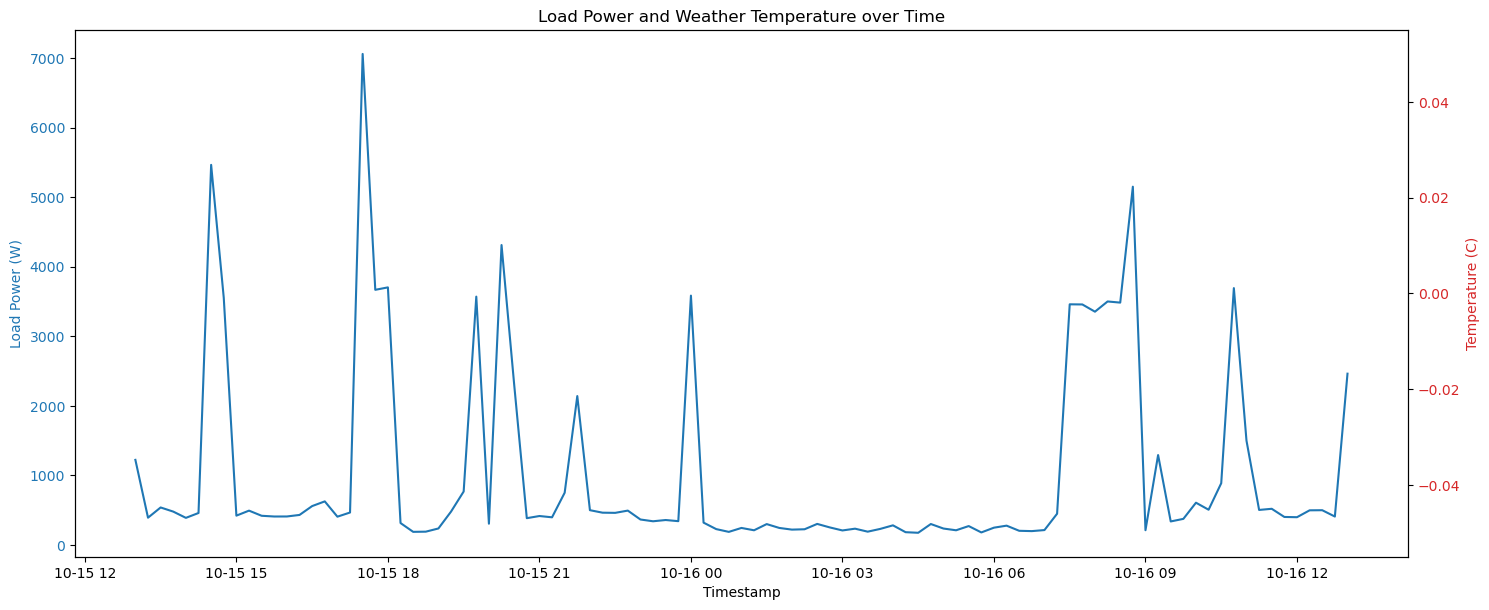

        customerID                  Date_UTC                 Date_NZDT  \
383160         850 2022-10-15 00:00:00+00:00 2022-10-15 13:00:00+00:00   
383161         850 2022-10-15 00:15:00+00:00 2022-10-15 13:15:00+00:00   
383162         850 2022-10-15 00:30:00+00:00 2022-10-15 13:30:00+00:00   
383163         850 2022-10-15 00:45:00+00:00 2022-10-15 13:45:00+00:00   
383164         850 2022-10-15 01:00:00+00:00 2022-10-15 14:00:00+00:00   
383165         850 2022-10-15 01:15:00+00:00 2022-10-15 14:15:00+00:00   
383166         850 2022-10-15 01:30:00+00:00 2022-10-15 14:30:00+00:00   
383167         850 2022-10-15 01:45:00+00:00 2022-10-15 14:45:00+00:00   
383168         850 2022-10-15 02:00:00+00:00 2022-10-15 15:00:00+00:00   
383169         850 2022-10-15 02:15:00+00:00 2022-10-15 15:15:00+00:00   

       Date_NZDate  date_settlementPeriod  load_power_W  weather_Temp_C  \
383160  2022-10-15                     27        1221.5             NaN   
383161  2022-10-15                 

In [93]:
def plot_customer_data(customer_id, day_num):
    df_customer = df[df['customerID'] == customer_id]
    
    fig, ax1 = plt.subplots(figsize=(15, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Load Power (W)', color=color)
    ax1.plot(df_customer['Date_NZDT'][day(day_num)], df_customer['load_power_W'][day(day_num)], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('Temperature (C)', color=color)  # we already handled the x-label with ax1
    print(df_customer['weather_Temp_C'][day(day_num)])
    ax2.plot(df_customer['Date_NZDT'][day(day_num)], df_customer['weather_Temp_C'][day(day_num)], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('Load Power and Weather Temperature over Time')
    plt.show()

plot_customer_data(850, 1)

print(df[df['customerID'] == 850][0:10])

In [52]:
df.columns

Index(['customerID', 'Date_UTC', 'Date_NZDT', 'Date_NZDate',
       'date_settlementPeriod', 'load_power_W', 'weather_Temp_C', 'Season'],
      dtype='object')

<Axes: >

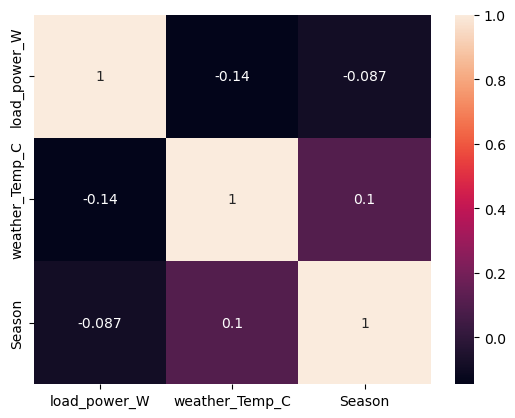

In [59]:
# Assuming df is your DataFrame
correlation_matrix = df[['load_power_W', 'weather_Temp_C', 'Season']].corr()
sns.heatmap(correlation_matrix, annot=True)


In [11]:
print(type(df['Date_UTC'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
